<h1 style="text-align:center"> Traitement d'images médicales  en python</h1>

---

Le terme *Traitement d'images* regroupe plusieurs significations selon la finalité que l'on en a.

- Identification d'objets, de personnes, ...
- Lissage, restauration, ... 
- Transformations géométriques, morphologiques, ...
- Reconstruction tomographique, ...
- Extraction d'informations, ... 

Dans le domaine médicale, nous sommes intéressés particulièrement par les techniques de *segmentation* et de *recalage* d'images. Ces techniques utilisent une grande partie, si ce n'est l'ensemble, des techniques listées ci-dessus.

Dans le TP/TD que nous allons suivre, vous allez apprendre à utiliser quelques bibliothèques python qui permettront d'apprehender une grande partie des tâches de traitement d'images médicales.

Pour suivre cette section, il faut être à l'aise avec la notion de liste et de array numpy. Pour rappel, consulter ce [document](../02_Python/rappels_listes_arrays.ipynb)

## Les bibliothèques Python de traitement d'images
----

En python, le nombre de bibliothèques *matures* de traitement d'images sont nombreuses. Citons par exemple:
- [Pillow](https://pillow.readthedocs.io/en/5.2.x/), 
- [scipy.ndimages](https://docs.scipy.org/doc/scipy/reference/ndimage.html#),
- [scikit-image](http://scikit-image.org),
- [OpenCV-Python](https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_tutorials.html),
- [SimpleITK](http://www.simpleitk.org/)

Ces bibliothèques sont assez complètes. Cependant, certains traitements spécifiques (filtres essentiellement) peuvent être absents dans certaines. C'est une des raisons pour lesquelles il est préférable d'apprendre à utiliser plusieures d'entre-elles  plutôt qu'une seule pour couvrir le maximum de situations.

Dans les TD/TP suivants, nous utiliserons essentiellement la bibliothèque standard et les bibliothèques *SimpleITK* et *scikit-image*.

# Prise en main de SimpleITK
-----------------
**[SimpleITK](http://www.simpleitk.org)** est une bibliothèque visant à faciliter l'utilisation de la bibliothèque [ITK](http://www.itk.org) en cachant sa relative complexité pour les profanes du c++ et en offrant des fonctionnalités de scripting avancées pour des languages tels que [python](http://www.python.org).

Ce premier document constitue une introduction au format des images au sein de SimpleITK.

## Les bases
----------
Pour commencer, nous importons le module *SimpleITK* dans l'espace de nommage.

In [34]:
import SimpleITK as sitk

## Construction d'une image
--------
Il existe plusieurs façons de créer une image ex nihilo dans ITK. Par exemple:

In [3]:
image = sitk.Image(256, 128, 64, sitk.sitkInt16)
image_2D = sitk.Image(64, 64, sitk.sitkFloat32)
image_2D = sitk.Image([32,32], sitk.sitkUInt32)
image_RGB = sitk.Image([128,128], sitk.sitkVectorUInt8, 3)

#### Les types de pixels
Voici la liste de tous les types d'images utilisables dans SimpleITK
<a name="table1"></a><table class='table table-striped'>
  <tr><td>sitkUInt8</td><td>Unsigned 8 bit integer</td><td>sitkInt8</td><td>Signed 8 bit integer</td></tr>
  <tr><td>sitkUInt16</td><td>Unsigned 16 bit integer</td><td>sitkInt16</td><td>Signed 16 bit integer</td></tr>
  <tr><td>sitkUInt32</td><td>Unsigned 32 bit integer</td><td>sitkInt32</td><td>Signed 32 bit integer</td></tr>
  <tr><td>sitkUInt64</td><td>Unsigned 64 bit integer</td><td>sitkInt64</td><td>Signed 64 bit integer</td></tr>
  <tr><td>sitkFloat32</td><td>32 bit float</td><td>sitkFloat64</td><td>64 bit float</td></tr>
  <tr><td>sitkComplexFloat32</td><td>complex number of 32 bit float</td><td>sitkComplexFloat64</td><td>complex number of 64 bit float</td></tr>
  <tr><td>sitkVectorUInt8</td><td>Multi-component of unsigned 8 bit integer</td><td>sitkVectorInt8</td><td>Multi-component of signed 8 bit integer</td></tr>
  <tr><td>sitkVectorUInt16</td><td>Multi-component of unsigned 16 bit integer</td><td>sitkVectorInt16</td><td>Multi-component of signed 16 bit integer</td></tr>
  <tr><td>sitkVectorUInt32</td><td>Multi-component of unsigned 32 bit integer</td><td>sitkVectorInt32</td><td>Multi-component of signed 32 bit integer</td></tr>
  <tr><td>sitkVectorUInt64</td><td>Multi-component of unsigned 64 bit integer</td><td>sitkVectorInt64</td><td>Multi-component of signed 64 bit integer</td></tr>
  <tr><td>sitkVectorFloat32</td><td>Multi-component of 32 bit float</td><td>sitkVectorFloat64</td><td>Multi-component of 64 bit float</td></tr>
  <tr><td>sitkLabelUInt8</td><td>RLE label of unsigned 8 bit integers</td><td>sitkLabelUInt16</td><td>RLE label of unsigned 16 bit integers</td></tr>
  <tr><td>sitkLabelUInt32</td><td>RLE label of unsigned 32 bit integers</td><td>sitkLabelUInt64</td><td>RLE label of unsigned 64 bit integers</td></tr>
</table>

<small>Il existe aussi `sitkUnknown`, qui est utilisé pour des types de pixel inconnus ou bien erroné au momment de l'exécution.
Les types entier de 64-bit ne sont pas disponibles sur tous les systèmes. Dans ce cas précis, la valeur est attribuée à `sitkUnknown`.</small>

## Lecture d'un fichier image
----------
La fonction ```ReadImage``` permet d'ouvrir le fichier d'une image présent sur le disque.

In [12]:
help(sitk.ReadImage)

Help on function ReadImage in module SimpleITK.SimpleITK:

ReadImage(*args)
    ReadImage(VectorString fileNames, itk::simple::PixelIDValueEnum outputPixelType) -> Image
    ReadImage(std::string const & filename, itk::simple::PixelIDValueEnum outputPixelType) -> Image
    
    
    
    ReadImage is a procedural interface to the ImageSeriesReader class which is convenient for most image reading tasks.
    
    
    Note that when reading a series of images that have meta-data
    associated with them (e.g. a DICOM series) the resulting image will
    have an empty meta-data dictionary. It is possible to programmatically
    add a meta-data dictionary to the compounded image by reading in one
    or more images from the series using the ImageFileReader class,
    analyzing the meta-dictionary associated with each of those images and
    creating one that is relevant for the compounded image.
    
    
    See:
     itk::simple::ImageFileReader for reading a single file



### Repérage spatial des images 
----------

Par convention, SimpleITK considère que **les images sont des objets physiques qui occupent une région close dans un espace physique**. 

Ce concept est illustré par la figure suivante :

<center><img id = origine src=./imgs/ImageOriginAndSpacing.png width=70%></center>

Les composants nécessaires pour définir une image :
1. Le type de pixel [*défini à la création, pas de valeur par défaut*] : pour la liste complète [voir au dessus](#table1).
2. Les dimensions [*défini à la création, pas de valeur par défaut*] : le nombre de pixels/voxels dans chaque direction. Cela définit les dimensions de l'image.
3. L'origine [*par défaut 0*] : coordonnée du pixel/voxel ayant l'indice (0,0,0) en unité physique (mm).
4. L'espacement [*par défaut 1*] : distance en mm séparant 2 pixels/voxels adjacents dans chaque dimension.
5. Matrice des directions [*par défaut la matrice identité*] : matrice liant les vecteurs directeurs de l'image et les axes des coordonnées physiques. 

Par convention, les indices des images commencent à 0. 

## Accéder aux attributs des images
Il est très simple d'accèder aux principales informations des images. 

In [4]:
print("les dimensions de l'image : ",image.GetSize()," pixels")
print("L'origine est positionné au pixel :", image.GetOrigin())
print("La dimension des pixels :", image.GetSpacing(), " mm")
print("Les cosinus directeurs de l'image sont :",image.GetDirection()) 
print("Le nombre d'octets par pixel :",image.GetNumberOfComponentsPerPixel()) 

les dimensions de l'image :  (256, 128, 64)  pixels
L'origine est positionné au pixel : (0.0, 0.0, 0.0)
La dimension des pixels : (1.0, 1.0, 1.0)  mm
Les cosinus directeurs de l'image sont : (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
Le nombre d'octets par pixel : 1


In [5]:
print("Pour obtenir les dimensions individuelles de l'image :")
print("méthode 1 -> largeur: {}, hauteur: {}, profondeur: {}".format(image.GetWidth(), 
                                                                     image.GetHeight(),
                                                                     image.GetDepth()))
print("méthode 2 -> largeur: {}, hauteur: {}, profondeur: {}".format(image.GetSize()[0],
                                                                     image.GetSize()[1],
                                                                     image.GetSize()[2]))
print("Dans le cas d'une image en 2D:")
print(image_2D.GetSize(), image_2D.GetDepth())

Pour obtenir les dimensions individuelles de l'image :
méthode 1 -> largeur: 256, hauteur: 128, profondeur: 64
méthode 2 -> largeur: 256, hauteur: 128, profondeur: 64
Dans le cas d'une image en 2D:
(32, 32) 0


## Accéder aux valeurs des pixels
----------
Il est possible d'accéder aux contenus des pixels grâce aux fonctions `SetPixel()` et `GetPixel()`.

Les fonctions d'accès et l'ordonnancement des pixels dans l'image suivent l'ordre [x,y,z].

In [13]:
help(image.GetPixel)

Help on method GetPixel in module SimpleITK.SimpleITK:

GetPixel(*idx) method of SimpleITK.SimpleITK.Image instance
    Returns the value of a pixel.
    
    This method takes 2 parameters in 2D: the x and y index,
    and 3 parameters in 3D: the x, y and z index.



In [6]:
# on affiche la valeur du pixel à l'origine
print("valeur du pixel avant: {}".format(image.GetPixel(0, 0, 0)))
# on assigne la valeur 1 au pixel à l'origine
image.SetPixel(0, 0, 0, 1)
# on affiche la valeur du pixel à l'origine
print("valeur du pixel après: {}".format(image.GetPixel(0, 0, 0)))

valeur du pixel avant: 0
valeur du pixel après: 1


On peut aussi utiliser une façon plus commune à *python* :

In [7]:
# on affiche la valeur du pixel à l'origine
print("valeur du pixel avant: {}".format(image[0,0,0]))
# on assigne la valeur 10 au pixel à l'origine
image[0,0,0] = 10
# on affiche la valeur du pixel à l'origine
print("valeur du pixel après: {}".format(image[0,0,0]))

valeur du pixel avant: 1
valeur du pixel après: 10


## Opérations matricielles basiques
-----------
On peut réaliser des opérations basiques sur les matrices images à l'aide des opérateurs de hachage python.

In [33]:
# Lecture d'une image
image_logo = sitk.ReadImage('SimpleITK.jpg')
# sous-echantillonnage à la hussarde
logo_subsampled = image_logo[::2,::2]
# extraction 
simple = image_logo[0:115,:]
print("avant:\t direction {},\t origine {}".format(simple.GetDirection(), simple.GetOrigin()))
# Get the sub-image containing the word Simple and flip it
simple_flipped = image_logo[115:0:-1,:]
print("après:\t direction {},\t origine {}".format(simple_flipped.GetDirection(), simple_flipped.GetOrigin()))

avant:	 direction (1.0, 0.0, 0.0, 1.0),	 origine (0.0, 0.0)
après:	 direction (-1.0, 0.0, 0.0, 1.0),	 origine (115.0, 0.0)


## Affichage des images
----
La fonction `Show()` de *SimpleITK* permet d'afficher l'image passée en paramètre à la fonction. Par défaut, le système cherchera à utiliser le logiciel *[ImageJ/FIJI](http://fiji.github.io/)* présent sur votre système. 

Pour les images 3D, il est possible/préférable de changer le comportement par défaut en assignant la variable d'environnement `SITK_SHOW_3D_COMMAND` sur une autre application permettant de visualiser les images ([`ITK-SNAP`](http://www.itksnap.org), [`3D Slicer`](www.slicer.org)).

In [22]:
import SimpleITK as sitk
# Uncomment the line below to change the default external viewer to your viewer of choice and test that it works.
%env SITK_SHOW_COMMAND "C:\Partage\Fiji.app\ImageJ-win64.exe"
%env SITK_SHOW_3D_COMMAND "C:\Program Files\Slicer 4.8.1\Slicer.exe"
# Retrieve an image from the network, read it and display using the external viewer
sitk.Show(image_logo)

env: SITK_SHOW_COMMAND="C:\Partage\Fiji.app\ImageJ-win64.exe"
env: SITK_SHOW_3D_COMMAND="C:\Program Files\Slicer 4.8.1\Slicer.exe"


Au sein d'un notebook, On peut utiliser une bibliothèque d'affichage telle que `matplotlib`.

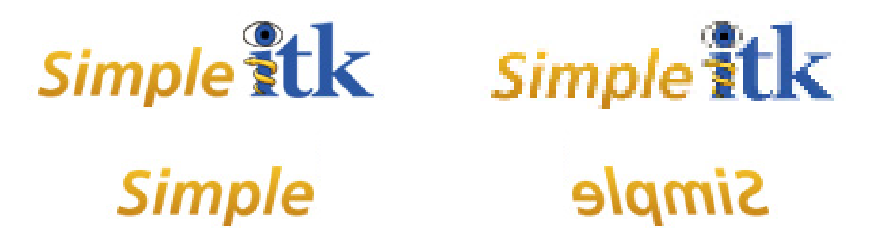

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(15,4))
plt.subplot(2,2,1)
plt.imshow(sitk.GetArrayViewFromImage(image_logo));
plt.axis('off');
plt.subplot(2,2,2)
plt.imshow(sitk.GetArrayViewFromImage(logo_subsampled));
plt.axis('off');
plt.subplot(2,2,3)
plt.imshow(sitk.GetArrayViewFromImage(simple));
plt.axis('off');
plt.subplot(2,2,4)
plt.imshow(sitk.GetArrayViewFromImage(simple_flipped));
plt.axis('off');

### SimpleITK vers Numpy et Numpy vers SimpleITK
-----------
l'indexation sous *SimpleITK* et *numpy* fonctionne en sens opposé! 

- SimpleITK : image[x,y,z]
- numpy : image_numpy_array[z,y,x]

#### SimpleITK vers Numpy

1. ```GetArrayFromImage()```: retourne une *copie* des pixels de l'image. Vous pouvez modifier les données à volonté sans effet sur l'image SimpleITK originale.
2. ```GetArrayViewFromImage()```: retourne une *vue* des pixels de l'image pour des fins d'affichage et consomme moins de mémoire. Vous ne pouvez pas modifier les pixels et **la vue sera inaccessible si les données originales viennent à disparaitre**.

#### Numpy vers SimpleITK
1. ```GetImageFromArray()```: retourne une image SimpleITK avec des meta-données par défaut: 
- origine à zéro, 
- dimensions des pixels unitaire pour toutes les dimensions
- la matrice des cosinus directeurs fixée to à la matrice identité. 

Les valeurs des pixels sont déterminées à partir du tableau numpy. __Dans la plupart des cas, vous devrez fixer les valeurs des meta-données de façon appropriée.__ 

## Opérations mathématiques au niveau pixel :
--------

- Les types de pixels doivent être identiques pour les images
- Méta-données prises en compte $\rightarrow$ chevauchement des images (pixel à pixel).
<table class='table table-striped' style="font-style:10em">
    <thead><th>Opérations mathématiques pour les images et les scalaires</th></thead>
    <tr><td>+</td><td>Addition</td></tr>
    <tr><td>-</td><td>Soustraction</td></tr>
    <tr><td>*</td><td>Multiplication</td></tr>
    <tr><td>/</td><td>Division</td></tr>
    <tr><td>//</td><td>Division entière</td></tr>
    <tr><td>**</td><td>Puissance</td></tr>
<table>
<p class='alert alert-danger'><small>Attention au dépassement de capacité et divisions par zéro.</small></p>    

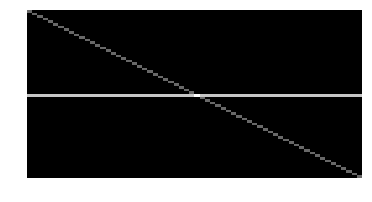

In [116]:
# construction de la première image
img_width = 128
img_height = 64
img1 = sitk.Image((img_width, img_height), sitk.sitkUInt8)
for i in range(img_width):
    img1[i,i//(img_width//img_height)] = 5
# consruction de la 2nd image
img2 = sitk.Image(img1.GetSize(), sitk.sitkUInt8)
# modification des paramètres de l'image 2
#img2.SetDirection([0,1,0.5,0.5])
#img2.SetOrigin([0.000001,0.000001])

for i in range(img_width):
    img2[i,img_height//2] = 10
img3 = img1 + img2
plt.imshow(sitk.GetArrayViewFromImage(img3), cmap=plt.cm.Greys_r)
plt.axis('off');

In [ ]:
# Resample slice to isotropic
original_spacing = sitk_xslice.GetSpacing()
original_size = sitk_xslice.GetSize()

min_spacing = min(sitk_xslice.GetSpacing())
new_spacing = [min_spacing, min_spacing]
new_size = [int(round(original_size[0]*(original_spacing[0]/min_spacing))), 
            int(round(original_size[1]*(original_spacing[1]/min_spacing)))]
resampleSliceFilter = sitk.ResampleImageFilter()

# Why is the image pixelated?
sitk_isotropic_xslice = resampleSliceFilter.Execute(sitk_xslice, new_size, sitk.Transform(), sitk.sitkNearestNeighbor, sitk_xslice.GetOrigin(),
                                                    new_spacing, sitk_xslice.GetDirection(), 0, sitk_xslice.GetPixelID())

plt.imshow(sitk.GetArrayViewFromImage(sitk_isotropic_xslice), cmap=plt.cm.Greys_r)
plt.axis('off')
print('Image spacing: {0}'.format(sitk_isotropic_xslice.GetSpacing()))